# Function Calling with images
- By Marcelo Rovai @26Sept24

## Importing libraries

In [22]:
import sys
import time
from haversine import haversine
import ollama
from openai import OpenAI
from pydantic import BaseModel, Field
import instructor

import matplotlib.pyplot as plt
from PIL import Image

In [23]:
#img = sys.argv[1]
MODEL = 'llava-phi3:3.8b'
mylat = -33.33
mylon = -70.51

In [24]:
!ls

 10-Ollama_Python_Library.ipynb     image_test_1.jpg	 Untitled1.ipynb
 20-Ollama_Function_Calling.ipynb  'image _test_2.jpg'	 Untitled.ipynb
 calc_distance_image.py		    image_test_3.jpg


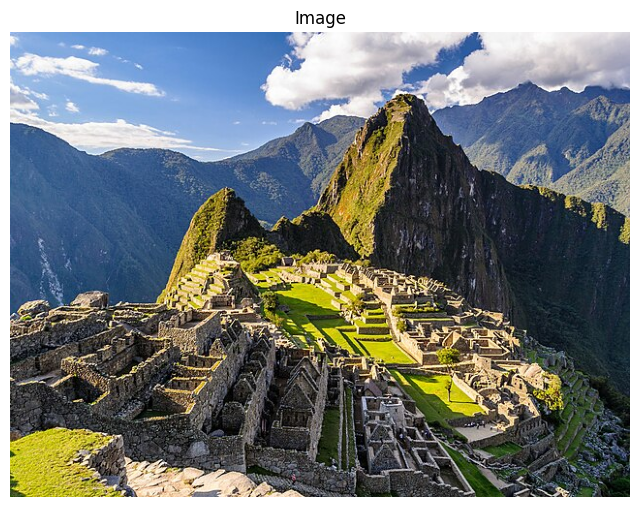

In [25]:
# Load he image
img_path = "image_test_3.jpg"
img = Image.open(img_path)

# Display the image
plt.figure(figsize=(8, 8))
plt.imshow(img)
plt.axis('off')
plt.title("Image")
plt.show()

In [36]:
def image_description(img_path):
    with open(img_path, 'rb') as file:
        response = ollama.chat(
            model=MODEL,
            messages=[
              {
                'role': 'user',
                'content': '''return the decimal latitude and decimal longitude 
                              of the city in the image, its name, and what 
                              country it is located''',
                'images': [file.read()],
              },
            ],
            options = {
              'temperature': 0,
              }
      )
    print(response['message']['content'])
    return response['message']['content']

In [31]:
start_time = time.perf_counter()  # Start timing

class CityCoord(BaseModel):
    city: str = Field(..., description="Name of the city in the image")
    country: str = Field(..., description="Name of the country where the city in the image is located")
    lat: float = Field(..., description="Decimal Latitude of the city in the image")
    lon: float = Field(..., description="Decimal Longitude of the city in the image")

# enables `response_model` in create call
client = instructor.patch(
    OpenAI(
        base_url="http://localhost:11434/v1",
        api_key="ollama",
    ),
    mode=instructor.Mode.JSON,
)

image_description = image_description(img_path)
# Send this description to the model
resp = client.chat.completions.create(
    model=MODEL,
    messages=[
        {
            "role": "user",
            "content": image_description,
        }
    ],
    response_model=CityCoord,
    max_retries=10,
    temperature=0,
)


The image shows the ancient city of Machu Picchu, located in Peru. The city is perched on a steep hillside and consists of various structures made of stone. It is surrounded by lush greenery and towering mountains. The sky above is blue with scattered clouds. 

Machu Picchu's latitude is approximately 13.5086° S, and its longitude is around 72.5494° W.


In [32]:
resp

CityCoord(city='Machu Picchu', country='Peru', lat=-13.5086, lon=-72.5494)

In [29]:
distance = haversine((mylat, mylon), (resp.lat, resp.lon), unit='km')

print(f"\n The image shows {resp.city}, with lat:{round(resp.lat, 2)} and long: {round(resp.lon, 2)}, located in {resp.country} and about {int(round(distance, -1)):,} kilometers away from Santiago, Chile.\n")

end_time = time.perf_counter()  # End timing
elapsed_time = end_time - start_time  # Calculate elapsed time
print(f" [INFO] ==> The code (running {MODEL}), took {elapsed_time:.1f} seconds to execute.\n")


 The image shows Machu Picchu, with lat:-13.16 and long: -72.54, located in Peru and about 2,250 kilometers away from Santiago, Chile.

 [INFO] ==> The code (running llava-phi3:3.8b), took 491.3 seconds to execute.



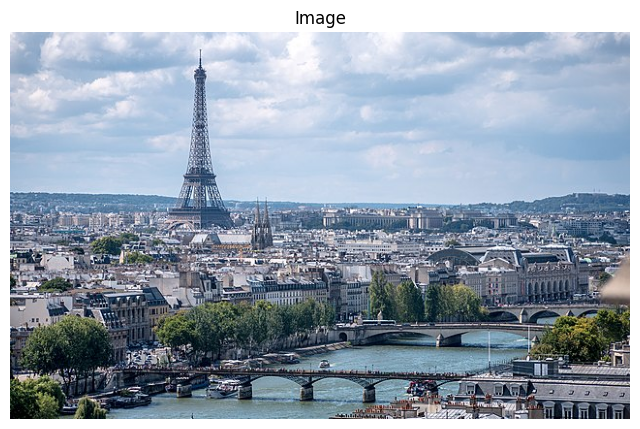

In [33]:
# Load he image
img_path = "image_test_1.jpg"
img = Image.open(img_path)

# Display the image
plt.figure(figsize=(8, 8))
plt.imshow(img)
plt.axis('off')
plt.title("Image")
plt.show()

In [37]:
start_time = time.perf_counter()  # Start timing

class CityCoord(BaseModel):
    city: str = Field(..., description="Name of the city in the image")
    country: str = Field(..., description="Name of the country where the city in the image is located")
    lat: float = Field(..., description="Decimal Latitude of the city in the image")
    lon: float = Field(..., description="Decimal Longitude of the city in the image")

# enables `response_model` in create call
client = instructor.patch(
    OpenAI(
        base_url="http://localhost:11434/v1",
        api_key="ollama",
    ),
    mode=instructor.Mode.JSON,
)

image_description = image_description(img_path)
# Send this description to the model
resp = client.chat.completions.create(
    model=MODEL,
    messages=[
        {
            "role": "user",
            "content": image_description,
        }
    ],
    response_model=CityCoord,
    max_retries=10,
    temperature=0,
)


The city in the image is Paris, France. The decimal latitude and longitude of Paris are approximately 48.8566° N, 2.3506° E.


In [38]:
distance = haversine((mylat, mylon), (resp.lat, resp.lon), unit='km')

print(f"\n The image shows {resp.city}, with lat:{round(resp.lat, 2)} and long: {round(resp.lon, 2)}, located in {resp.country} and about {int(round(distance, -1)):,} kilometers away from Santiago, Chile.\n")

end_time = time.perf_counter()  # End timing
elapsed_time = end_time - start_time  # Calculate elapsed time
print(f" [INFO] ==> The code (running {MODEL}), took {elapsed_time:.1f} seconds to execute.\n")


 The image shows Paris, with lat:48.86 and long: 2.35, located in France and about 11,630 kilometers away from Santiago, Chile.

 [INFO] ==> The code (running llava-phi3:3.8b), took 446.5 seconds to execute.

